# Z czym się je Gradient Descent?
Gradient Descent to jeden z najprostszych algorytmów znajdywania minimum w funkcji. Jest o tyle fajny, że wybierając punkt w funkcji będzie brał tym większe kroki im dalej jest od minimum, a tym samym tym mniejsze im bliżej tego minimum jest. Daje to fajne efekty obliczeniowe.

## Źródła
+ [https://www.youtube.com/watch?v=xRJCOz3AfYY](https://www.youtube.com/watch?v=xRJCOz3AfYY)
+ [https://www.youtube.com/watch?v=sDv4f4s2SB8](https://www.youtube.com/watch?v=sDv4f4s2SB8)

In [1]:
%matplotlib notebook

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np


''' opisane po co to w ostatnim kroku '''
maxwykresu = 0

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
x = [1,2,3]
y = [4,5,6]
plt.plot(x,y)

<IPython.core.display.Javascript object>

## Dataset 
Na dobry początek wybieramy punkty dla których będziemy wyznaczać średnią linię

In [2]:
datapoints = np.array([[1, 10], [2, 8], [3, 7], [4, 5], [10,-20]])

In [3]:
plt.figure()
x, y = datapoints.T
plt.scatter(x, y)
plt.title("Dataset")
plt.show()

<IPython.core.display.Javascript object>

## Podstawowe funkcje
Następnie tworzymy funkcje do:
+ przeliczenia wysokości dla punktu bazując na równaniu zwykłej prostej: y=ax+b
+ przeliczenia sum of squared residuals (jeszce nie wiem jak to się po polsku nazywa 😝)

In [4]:
def przelicz_wysokosc_prostej_od_punktu(Afunkcji, Bfunkcji, Xpunktu):
    return Afunkcji*Xpunktu+Bfunkcji

Funkcja ta ma za zadanie zwrócić sumę kwadratów różnicy wysokości między rzeczywistym punktem ze zbioru danych, a otrzymaną wysokością na podstawie podanego równania (również y=ax+b)

In [5]:
def sum_of_squared_residuals(punkty, Afunkcji, Bfunkcji):
    suma = 0
    for punkt in punkty:
        suma = suma + (punkt[1] - przelicz_wysokosc_prostej_od_punktu(Afunkcji, Bfunkcji, punkt[0]))**2
        
    return suma

## Funkcja loss

Możemy teraz zobrazować wykres funkcji "sum of the squared residuals", który jest naszą funkcją loss i to ją musimy zminimalizować. Funkcja zależy od dwóch parametrów, więc nasz wykres będzie 3D.

<IPython.core.display.Javascript object>


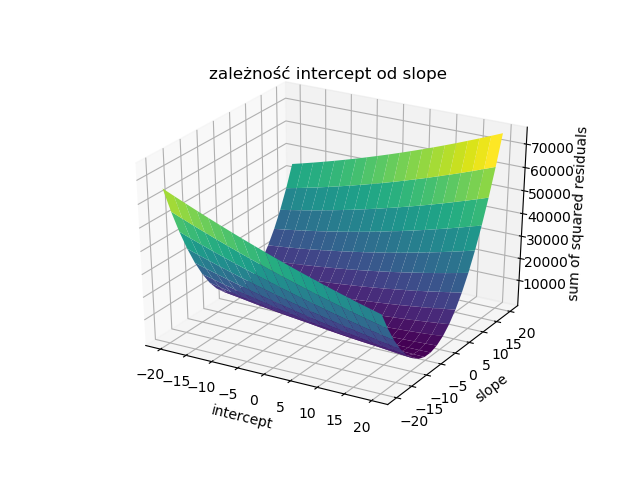

In [6]:
intercepts = np.linspace(-20,20,20)
slopes = np.linspace(-20,20,20)

Intercepts, Slopes = np.meshgrid(intercepts, slopes)

Funkcja = sum_of_squared_residuals(datapoints, Slopes, Intercepts)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Intercepts, Slopes, Funkcja, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('intercept')
ax.set_ylabel('slope')
ax.set_zlabel('sum of squared residuals');
ax.set_title('zależność intercept od slope')
plt.show()

## Styczna do prostej
Musimy teraz wyznaczyć pochodną dla tej funkcji, co by mieć funkcję, do wyznaczania stycznej. Musimy tak długo szukać minimum aż wartości intercept_step oraz slope_step będą poniżej 0.0001.

## Styczna do prostej dla intercept
### Jak to policzyć
##### Warto skorzystać z "chain rule". 

Bierzemy na początek funkcję, która służyła nam do obliczenia jednego z elementów "sum of squared residuals".

*f = (h - (slope * x + intercept))^2*

Więc nasza pochodna wynosi:

*f' = 2 * (h - (slope * x + intercept))^1 * f'(2h)-f(slope*x)-f(intercept)*

Z tego dostaniemy coś skomplikowanego, ale co by tak nie robić zakładamy, że nasz x, h oraz slope są określonymi liczbami. Otrzymujemy w ten sposób pochodną:

*f'(2h)-f(slope * x)-f(intercept)*

co po założeniu znania x, h oraz slope daje nam:

*f' = 2 * (h - (slope * x + intercept))^1 * (-1)*

więc finalnie

*-2 * (h-(intercept+slope * x))*

In [7]:
def derivative_of_sum_of_squared_residuals_intercept(h, x, intercept, slope):
    return -2*(h - (intercept + slope*x))

## Styczna do prostej dla slope
### Jak to policzyć
##### Warto skorzystać z "chain rule". 

Bierzemy na początek funkcję, która służyła nam do obliczenia jednego z elementów "sum of squared residuals".

*f = (h - (slope * x + intercept))^2*

Więc nasza pochodna wynosi:

*f' = 2 * (h - (slope * x + intercept))^1 * f'(2h)-f(slope*x)-f(intercept)*

Z tego dostaniemy coś skomplikowanego, ale co by tak nie robić zakładamy, że nasz x, h oraz intercept są określonymi liczbami. Otrzymujemy w ten sposób pochodną:

*f'(2h)-f(slope * x)-f(intercept)*

co po założeniu znania x, h oraz intercept daje nam:

*f' = 2 * (h - (slope * x + intercept))^1 * (-x)*

więc finalnie

*-2 * x * (h - (intercept + slope * x))*

In [8]:
def derivative_of_sum_of_squared_residuals_slope(h, x, intercept, slope):
    return -2*x*(h-(intercept+slope*x))

## Learning rate
Tutaj tworzymy główną metodę Gradient Descent, czyli zmniejszanie stepu w miarę bycia w pobliżu minimum.

Ważny wzór: *stepsize = suma w jednym kroku * learningrate*

In [9]:
''' tworzymy tablicę punktów do wykresiku '''
pkts_intercept = []
pkts_slope = []

''' nadpisujemy intercept z tych poprzednich kroków '''
intercept = 0
slope = 1

''' ustawiamy learning rate '''
learningrate = 1e-3

''' inicjujemy stepsize do rozpoczęcia pętli '''
stepsize_intercept = 1
stepsize_slope = 1

''' bierzemy wartość absolutną stepsize, ponieważ będzie ona przyjmować wartości ujemne i dodatnie. 
Step może wejśc na zbocze rosnące, przez co będzie musiał przyjąć wartość odwrotną (dodatnią) do standardowej
w czasie przeszukiwania.'''
for cnt in range(10000):
    suma_intercept = 0
    suma_slope = 0
    
    for punkt in datapoints:
        suma_intercept = suma_intercept + derivative_of_sum_of_squared_residuals_intercept(punkt[1], punkt[0], intercept, slope)
        suma_slope = suma_slope + derivative_of_sum_of_squared_residuals_slope(punkt[1], punkt[0], intercept, slope)
        
        ''' maxwykresu potrzebujemy, żeby wiedzieć do jakiego punktu printować punkty funkcji '''
        if punkt[0] > maxwykresu:
            maxwykresu = punkt[0]
    
    ''' dodajemy do wykresu '''
    pkts_intercept.append([cnt, intercept])
    pkts_slope.append([cnt, slope])
    
    ''' stepsize '''
    stepsize_intercept = suma_intercept * learningrate
    stepsize_slope = suma_slope * learningrate
    
    ''' od interceptu i slope odejmujemy stepsize_intercept oraz stepsize_slope '''
    ''' z warunkiem, że jeszcze się dobrze nie nauczyliśmy  (abs(stepsize_intercept) >= 0.0001)'''
    if abs(stepsize_intercept) >= 0.0001:
        intercept = intercept - stepsize_intercept
    if abs(stepsize_slope) >= 0.0001:
        slope = slope - stepsize_slope
    
    cnt=cnt+1
    
print('stepsize', stepsize_intercept, stepsize_slope)
print('intercept', intercept)
print('slope', slope)

stepsize -9.951887792073321e-05 9.711315795442488e-05
intercept 15.810240565422433
slope -3.4550481133036266


## Opis wykresu
Funkcja powinna na początku szybko rosnąć, a pod koniec wykresu coraz wolniej. Wynika to z zachowania właściwości, że coraz mniejsze kroki robimy na miarę bycia coraz bliżej minimum.

<IPython.core.display.Javascript object>


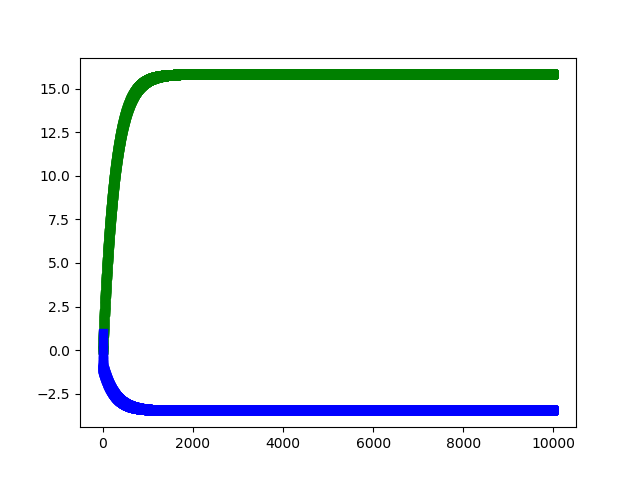

In [10]:
xxxx1, yyyy1 = np.array(pkts_intercept).T
xxxx2, yyyy2 = np.array(pkts_slope).T

plt.figure()
plt.plot(xxxx1, yyyy1, 'gs', xxxx2, yyyy2, 'bs')
plt.show()

<IPython.core.display.Javascript object>


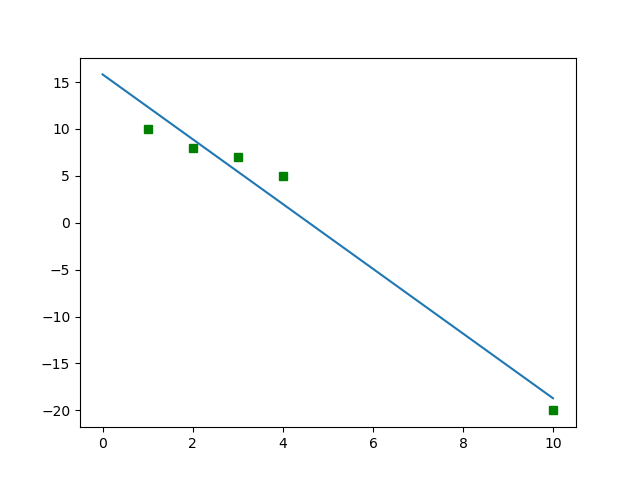

In [11]:
x, y = datapoints.T

prosta = []

for xcnt in range(maxwykresu*100):
    prosta.append([xcnt/100, przelicz_wysokosc_prostej_od_punktu(slope, intercept, xcnt/100)])   
    
xxxxx, yyyyy = np.array(prosta).T

plt.figure()
plt.plot(x, y, 'gs', xxxxx, yyyyy)
plt.show()